# Local and Collective Noise in the Driven-Dissipative Dynamics of Large Two-Level System Ensembles 

Notebook Author: Nathan Shammah (nathan.shammah@gmail.com) 
PIQS code: Nathan Shammah (nathan.shammah@gmail.com), Shahnawaz Ahmed (shahnawaz.ahmed95@gmail.com)

### Module

Below we give an introduction to PIQS, the Permutational Invariant Quantum Solver [1], which is integrated in  QuTiP from version 4.3 [2] and can be imported as a module simply with $\texttt{qutip.piqs}$. 

![title](images/piqs.png)

### Introduction to the Open Dynamics

We are interested in considering the non-unitary dynamics of a quantum system interacting with a larger environment, whose evolution is goverened by 
\begin{eqnarray}
\dot{\rho} = \mathcal{D}(\rho) &=& 
-\frac{i}{\hbar}\lbrack H,\rho \rbrack
+\frac{\gamma}{2}\mathcal{L}_{A}[\rho],
\end{eqnarray}

where $\rho$ is the density matrix of the system, $\mathcal{D}$ is the Liouvillian superoperator, $H$ is the Hamiltonian of the system and $\mathcal{L}_{A}[O]=AOA^\dagger-\frac{1}{2}A^\dagger A O-\frac{1}{2} OA^\dagger A$ is the Lindbladian of the system, with $A$ a jump operator, and $\gamma$ is the dissipation rate. Considering this Lindblad dynamics implies making the Born, Markov, and Secular approximations regarding the system-environment interaction.    

For a system comprising several two-level systems (TLSs), the Hilbert space grows like $2^N$ and in general the Liouvillian space grows like $2^N\times2^N=4^N$. This fact strongly limits the direct use of numerical methods to solve the dynamics in the uncoupled basis. 

If additional symmetries are present in the system, the complexity of the problem can be reduced. If only collective processes are present, the collective system can be mapped to an effective large spin of dimension $(N+1)$.

If also local processes are present in the Lindblad dissipation terms, in general such reduction is not possible. However, if one can assume that the local dissipation noise affects with an identical rate each of the TLSs, a reduction in the complexity of the problem can be performed. 

The *Permutational Invariant Quantum Solver* (PIQS) is an open-source Python solver to study the exact Lindbladian dynamics of open quantum systems consisting of identical qubits. PIQS is integrated in QuTiP and can be imported as as a model simply by importing it as $\texttt{qutip.piqs}$.

Using this library, the Liouvillian of an ensemble of $N$ qubits, or two-level systems (TLSs), $\mathcal{D}_{TLS}(\rho)$, can be built using only polynomial – instead of exponential – resources. This has many applications for the study of realistic quantum optics models of many TLSs and in general as a tool in cavity QED [1].

We can consider a system evolving according to the equation

\begin{eqnarray}
\dot{\rho} = \mathcal{D}_\text{TLS}(\rho) &=& 
-\frac{i}{\hbar}\lbrack H,\rho \rbrack
+\frac{\gamma_\text{CE}}{2}\mathcal{L}_{J_{-}}[\rho]
+\frac{\gamma_\text{CD}}{2}\mathcal{L}_{J_{z}}[\rho]
+\frac{\gamma_\text{CP}}{2}\mathcal{L}_{J_{+}}[\rho]\nonumber\\
&&+\sum_{n=1}^{N}\left(
\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{-,n}}[\rho]
+\frac{\gamma_\text{D}}{2}\mathcal{L}_{J_{z,n}}[\rho]
+\frac{\gamma_\text{P}}{2}\mathcal{L}_{J_{+,n}}[\rho]\right)
\end{eqnarray}

where $J_{\alpha,n}=\frac{1}{2}\sigma_{\alpha,n}$ are SU(2) Pauli spin operators, with ${\alpha=x,y,z}$ and $J_{\pm,n}=\sigma_{\pm,n}$. The collective spin operators are $J_{\alpha} = \sum_{n}J_{\alpha,n}$. The Lindblad super-operators are $\mathcal{L}_{A} = 2A\rho A^\dagger - A^\dagger A \rho - \rho A^\dagger A$.

The inclusion of local processes in the dynamics leads to using a Liouvillian space of dimension $4^N$. By exploiting the permutational invariance of identical particles [2-8], the Liouvillian $\mathcal{D}_\text{TLS}(\rho)$ can be built with an exponential decrease in resources and the density matrix is a block-diagonal matrix in the basis of Dicke states $|j, m \rangle$ with only $O(N^3)$ non-zero matrix elements.


### Defining the Lindbladian terms

The system under study is defined by creating an object of the $\texttt{Piqs}$ class, e.g. simply named $\texttt{system}$, whose first attribute is 

- $\texttt{system.N}$, the number of TLSs of the system $N$.

The rates for collective and local processes are simply defined as 

- $\texttt{collective}\_ \texttt{emission}$ defines $\gamma_\text{CE}$, collective (superradiant) emission


- $\texttt{collective}\_ \texttt{dephasing}$ defines $\gamma_\text{CD}$, collective dephasing 


- $\texttt{collective}\_ \texttt{pumping}$ defines $\gamma_\text{CP}$, collective pumping. 


- $\texttt{emission}$ defines $\gamma_\text{E}$, incoherent emission (losses) 


- $\texttt{dephasing}$ defines $\gamma_\text{D}$, local dephasing 


- $\texttt{pumping}$  defines $\gamma_\text{P}$, incoherent pumping. 

The table below summarizes and compares the meaning of the keywords for an object of the Dicke class,

<table>
    <tr>
<td> Keyword</td>
<td> Rate  $\gamma_j$</td>
<td> Lindbladian $\mathcal{L}[\rho]$</td>
</tr>

<tr>
<td> $\texttt{emission}$ </td>
<td> $\gamma_\text{E}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=&\sum_n^N \left(J_{-,n}\rho J_{+,n} - \frac{1}{2}J_{+,n}J_{-,n}\rho - \frac{1}{2}\rho J_{+,n}J_{-,n} \right)\end{eqnarray}</td>
</tr>

<tr>
<td> $\texttt{pumping}$ </td>
<td> $\gamma_\text{P}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=&\sum_n^N \left(J_{+,n}\rho J_{-,n} - \frac{1}{2}J_{-,n}J_{+,n}\rho - \frac{1}{2}\rho J_{-,n}J_{+,n} \right)\end{eqnarray}</td>
</tr>

<tr>
<td> $\texttt{dephasing}$ </td>
<td> $\gamma_\text{D}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=&\sum_n^N \left(J_{z,n}\rho J_{z,n} - \frac{1}{2}J_{z,n}J_{z,n}\rho - \frac{1}{2}\rho J_{z,n}J_{z,n} \right)\end{eqnarray}</td>
</tr>

<tr>
<td> $\texttt{collective}\_\texttt{emission}$ </td>
<td> $\gamma_\text{CE}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=& J_{-}\rho J_{+} - \frac{1}{2}J_{+}J_{-}\rho - \frac{1}{2}\rho J_{+}J_{-} \end{eqnarray}</td>
</tr>

<tr>
<td> $\texttt{collective}\_\texttt{pumping}$ </td>
<td> $\gamma_\text{CP}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=&  J_{+}\rho J_{-} - \frac{1}{2}J_{-}J_{+}\rho - \frac{1}{2}\rho J_{-}J_{+} \end{eqnarray}</td>
</tr>

<tr>
<td> $\texttt{collective}\_\texttt{dephasing}$ </td>
<td> $\gamma_\text{CD}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=& J_{z}\rho J_{z} - \frac{1}{2}J_{z}^2\rho - \frac{1}{2}\rho J_{z}^2 \end{eqnarray}</td>
</tr>

</table>

We assume below that the object of the Dicke class created is named $\texttt{system}$. Then $\texttt{system.lindbladian()}$ creates the total TLS Lindbladian superoperator matrix that is already a quantum object (of QuTiP's $\texttt{Qobj}$ class) with the correct dimensions and shape in the Dicke basis.

### Defining the Hamiltonian 

Similarly, $\texttt{system.hamiltonian}$ defines the TLS hamiltonian of the system $H_\text{TLS}$. The total spin operators $J_\alpha$ can be defined with the $\texttt{jspin()}$ function. 

### Defining the Liouvillian (Lindbladian part + Hamiltonian)

The system's Liouvillian can be built using $\texttt{system.liouvillian()}$, which includes the Lindbladian part and the Hamiltonian, if they have been defined as attributes of the $\texttt{system}$ object. The system's Lindbladian (the Liouvillian without the Hamiltonian) can be built using $\texttt{system.lindbladian()}$. 

Some important properties of the Piqs object can be visualized by simply calling $\texttt{system}$ (i.e. the object's name) to screen. 

Below we give basic examples on the use of $\texttt{qutip.piqs}$. In the first example the incoherent emission of $N$ driven TLSs is considered. In the second example the two-level system ensemble is a subsystem coupled to another subsystem, a bosonic cavity. Similar considerations apply to the coupling to different kinds of subsystems (a single qubit, another two-level system ensmble). 

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

from qutip import *
from qutip.piqs import *

import matplotlib.animation as animation
from IPython.display import HTML
from IPython.core.display import Image, display

## $1$. $N$ Qubits Dynamics
We study a driven ensemble of $N$ TLSs emitting incoherently,

\begin{eqnarray}
H_\text{TLS}&=&\hbar\omega_{0} J_{z}+\hbar\omega_{x} J_{x}
\end{eqnarray}

\begin{eqnarray}
\dot{\rho} &=& \mathcal{D}_\text{TLS}(\rho)= -\frac{i}{\hbar}\lbrack H_\text{TLS},\rho \rbrack+\sum_{n=1}^{N}\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{-,n}}[\rho]
\end{eqnarray}

In [2]:
N = 20
system = Dicke(N = N)
[jx, jy, jz] = jspin(N)
jp = jspin(N,"+")
jm = jp.dag()
w0 = 0.5
wx = 1.0
system.hamiltonian = w0 * jz + wx * jx
system.emission = 0.05
D_tls = system.liouvillian() 

The properties of a given object can be updated dynamically, such that local dephasing could be added to the object $\texttt{'system'}$ symply with 

In [3]:
system.dephasing = 0.1
D_tls = system.liouvillian() 

Calculating the TLS Steady state and steady expectation values is straightforward with QuTiP's $\texttt{steadystate}()$ and $\texttt{expect}()$ [9]. 

In [4]:
steady_tls = steadystate(D_tls)
jz_ss = expect(jz, steady_tls)
jpjm_ss = expect(jp*jm, steady_tls)

Calculating the TLS time evolution can be done with QuTiP's $\texttt{mesolve}()$

In [5]:
rho0_tls = dicke(N, N/2, -N/2)
t = np.linspace(0, 100, 1000)
result = mesolve(D_tls, rho0_tls, t, [], e_ops = [jz])
rhot_tls = result.states
jzt = result.expect[0]

### Visualization

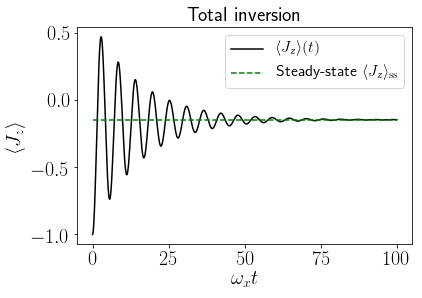

In [6]:
j_max = N/2.
label_size = 20

fig1 = plt.figure(1)

plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
plt.plot(wx*t, jzt/j_max, 'k-', label=r'$\langle J_{z}\rangle(t)$')
plt.plot(wx*t, wx*t * 0 + jz_ss/j_max, 'g--', label = R'Steady-state $\langle J_{z}\rangle_\mathrm{ss}$')
plt.title(r'Total inversion', fontsize = label_size)
plt.xlabel(r'$\omega_xt$', fontsize = label_size)
plt.ylabel(r'$\langle J_{z}\rangle$', fontsize = label_size)
plt.legend( fontsize = 0.8 * label_size)
#plt.yticks([-1, -0.99])
plt.show()
plt.close()

We can observe from the plot above that the driven system relaxes toward the steady state due to the presence of incoherent local emission and local dephasing. 

## $2$. Dynamics of $N$ Qubits in a Bosonic Cavity 

Now we consider an ensemble of spins in a driven, leaky cavity

\begin{eqnarray}
\dot{\rho} &=& \mathcal{D}_\text{TLS}(\rho) +\mathcal{D}_\text{phot}(\rho) -\frac{i}{\hbar}\lbrack H_\text{int}, \rho\rbrack\nonumber\\
&=& -i\lbrack \omega_{0} J_{z} + \omega_{c} a^\dagger a + g\left(a^\dagger+a\right)J_{x},\rho \rbrack+\frac{w}{2}\mathcal{L}_{a^\dagger}[\rho]+\frac{\kappa}{2}\mathcal{L}_{a}[\rho]+\sum_{n=1}^{N}\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{-,n}}[\rho]
\end{eqnarray}

where now the full system density matrix is defined on a tensor Hilbert space $\rho \in \mathcal{H}_\text{TLS}\otimes\mathcal{H}_\text{phot}$, where the dymension of $\mathcal{H}_\text{TLS}$ is reduced from $2^N$ using the approach of an uncoupled basis to $O(N^2)$ using $\texttt{qutip.piqs}$.

Thanks to QuTiP's $\texttt{super}\_\texttt{tensor}()$ function, we can add the two independently built Liouvillians, being careful only to place the light-matter interaction of the Hamiltonian in the total Hilbert space and creating the corresponding "left" and "right" superoperators with $\texttt{spre}()$ and $\texttt{spost}()$.

In [7]:
# TLS parameters
n_tls = 5
N = n_tls
system = Dicke(N = n_tls)
[jx, jy, jz] = jspin(N)
jp = jspin(N,"+")
jm = jp.dag()
w0 = 1.
wx = 0.1
system.hamiltonian = w0 * jz + wx * jx
system.emission = 0.5
D_tls = system.liouvillian() 

# Light-matter coupling parameters
wc = 1.
g = 0.9
kappa = 1
pump = 0.1
nphot = 16
a = destroy(nphot)
h_int = g * tensor(a + a.dag(), jx)

# Photonic Liouvillian
c_ops_phot = [np.sqrt(kappa) * a, np.sqrt(pump) * a.dag()]
D_phot = liouvillian(wc * a.dag()*a , c_ops_phot)

# Identity super-operators
nds = num_dicke_states(n_tls)
id_tls = to_super(qeye(nds))
id_phot = to_super(qeye(nphot))

# Define the total Liouvillian
D_int = -1j* spre(h_int) + 1j* spost(h_int)
D_tot = D_int + super_tensor(D_phot, id_tls) + super_tensor(id_phot, D_tls)

# Define operator in the total space
nphot_tot = tensor(a.dag()*a, qeye(nds))

### Wigner function and steady state $\rho_\text{ss}$

In [8]:
rho_ss = steadystate(D_tot)
nphot_ss = expect(nphot_tot, rho_ss)
psi = rho_ss.ptrace(0)
xvec = np.linspace(-6, 6, 100)
W = wigner(psi, xvec, xvec)

### Visualization

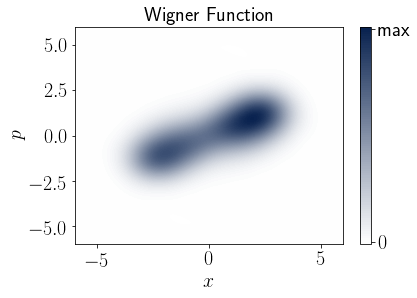

In [9]:
jmax = (0.5 * N)
j2max = (0.5 * N + 1) * (0.5 * N)

plt.rc('text', usetex = True)
label_size = 20
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

wmap = wigner_cmap(W)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(0, W.max())
max_cb =np.max(W)
min_cb =np.min(W)

fig2 = plt.figure(2)
plotw = plt.contourf(xvec, xvec, W, 100, cmap=wmap, norm=nrm)

plt.title(r"Wigner Function", fontsize=label_size);
plt.xlabel(r'$x$', fontsize = label_size)
plt.ylabel(r'$p$', fontsize = label_size)
cb = plt.colorbar()
cb.set_ticks( [min_cb, max_cb])
cb.set_ticklabels([r'$0$',r'max'])    

plt.show()
plt.close()

In the contour plot above it is visible that the Wigner function of the bosonic degrees of freedom of the light-matter system in the steady state is characterized by two displaced squeezed blobs in the $(x,p)$ phase space. This is a fingerprint of superradiance and it can intuitively pictured as the system not choosing between two minima of the potential.   

### Time evolution of $\rho(t)$

In [10]:
excited_state = excited(N)
ground_phot = ket2dm(basis(nphot,0))
rho0 = tensor(ground_phot, excited_state)
t = np.linspace(0, 20, 1000)
result2 = mesolve(D_tot, rho0, t, [], e_ops = [nphot_tot], 
                  options = Options(store_states=True))
rhot_tot = result2.states
nphot_t = result2.expect[0]

### Visualization

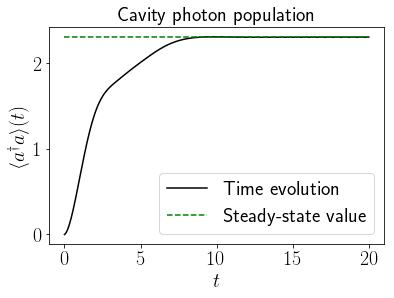

In [11]:
fig3 = plt.figure(3)
plt.plot(t, nphot_t, 'k-', label='Time evolution')
plt.plot(t, t*0 + nphot_ss, 'g--', label = 'Steady-state value')
plt.title(r'Cavity photon population', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)

plt.legend(fontsize = label_size)
plt.show()
plt.close()

From the plot above, it is visible that in the steady state a non-zero quantity of photons is present in the cavity.

 ### Steady-state correlations: $g^{(2)}(\tau)$ for $\rho_\text{ss}$
We define the $g^{(2)}(\tau)$ of the system as the two-time correlation function of the intracavity photons,
\begin{eqnarray}
g^{(2)}(\tau) &=& \frac{\langle: a^\dagger(\tau) a^\dagger(0) a(\tau) a(0) :\rangle}{|\langle: a^\dagger(0) a(0) :\rangle|^2}\nonumber.
\end{eqnarray}

In [12]:
B = nphot_tot
rhoA = B * rho_ss
result3 = mesolve(D_tot, rhoA, t, [], e_ops = B)
g2_t = result3.expect[0]

### Visualization

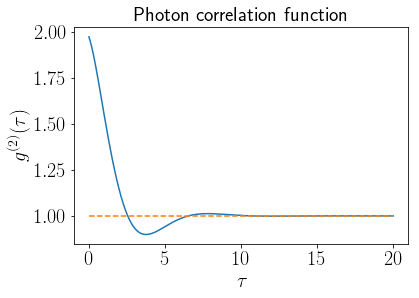

In [13]:
fig4 = plt.figure(4)
plt.plot(t, np.real(g2_t)/nphot_ss**2, '-')
plt.plot(t, 0*t + 1, '--')
plt.title(r'Photon correlation function', fontsize = label_size)
plt.xlabel(r'$\tau$', fontsize = label_size)
plt.ylabel(r'$g^{(2)}(\tau)$', fontsize = label_size)

plt.show()
plt.close()

The plot above shows that the the photons are bunched, $g^2(0)>1$.

## $3$. Initial States

### Dicke basis
$\texttt{qutip.piqs}$ allows the user to quickly define initial states as density matrices in the Dicke basis, whose sides are of dimension $O(N^2)$ (by default) and contain only $O(N^3)$ non-zero matrix elements due to the block-diagonal structure, or in the uncoupled TLS basis $2^N$ (by setting the basis specification as $\texttt{basis='uncoupled'}$). Below we give an overview of

- Dicke states with "$\texttt{dicke}()$",


- Greenberger–Horne–Zeilinger (GHZ), called by "$\texttt{ghz}()$",


- Coherent Spin States (CSS) called by "$\texttt{css}()$",

hereafter all expressed in the compact Dicke basis.

In [14]:
N = 6
#Dicke Basis
dicke_blocks = np.real(block_matrix(N).todense())
#Dicke states
excited_state = dicke(N, N/2, N/2)
superradiant_state = dicke(N, N/2, j_min(N))
subradiant_state = dicke(N, j_min(N), -j_min(N))
ground_state = dicke(N, N/2, -N/2)
gP = 1
gE = .3*gP 
system = Dicke(N, pumping = gP, emission = gE)
Liouv = system.liouvillian()
rho_thermal = steadystate(Liouv)
#rhoss
N2 = 7
#GHZ state
ghz_state = ghz(N2)
#CSS states
a = 1/np.sqrt(2)
b = 1/np.sqrt(2)
css_symmetric = css(N2, a, b)
css_antisymmetric = css(N2, a, -b)

### Visualization

In [15]:
label_size = 15
c_map = 'bwr'

# Convert to real-valued dense matrices
rho1 = np.real(css_antisymmetric.full())
rho3b = np.real(ghz_state.full())         
rho4b = np.real(css_symmetric.full())
rho5 = np.real(excited_state.full())
rho6 = np.real(superradiant_state.full())
rho7 = np.real(ground_state.full())
rho8 = np.real(subradiant_state.full())
rho9 = dicke_blocks
rho10 = np.real(rho_thermal.full())

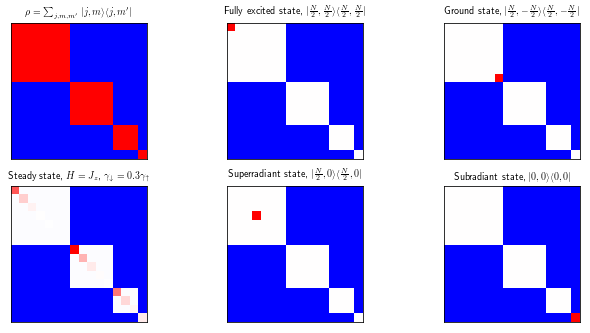

In [16]:
# Dicke basis
plt.rc('text', usetex = True)
#mpl.rc('pdf', fonttype=42)
mpl.rcParams['pdf.fonttype'] = 42
from matplotlib import rc
#plt.rcParams['ps.useafm'] = True
factor = 0.5 
label_size = 20*factor
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22*factor, 11*factor))
fig1 = axes[0,0].imshow(rho9, cmap = c_map)
axes[0,0].set_title(r"$\rho=\sum_{j,m,m'}|j,m\rangle\langle j,m'|$",
          fontsize = label_size)
plt.setp(axes, xticks=[],
        yticks=[])
#Excited
fig2 = axes[0,1].imshow(rho9+rho5, cmap = c_map)
string = "Fully excited state, $|\\frac{N}{2},\\frac{N}{2}\\rangle\\langle \\frac{N}{2},\\frac{N}{2}|$"
axes[0,1].set_title("{}".format(string), 
                    fontsize = label_size)
#Ground
fig3 = axes[0,2].imshow(rho9+rho7, cmap = c_map)    
axes[0,2].set_title(r"Ground state, $|\frac{N}{2},-\frac{N}{2}\rangle\langle \frac{N}{2},-\frac{N}{2}|$", 
                    fontsize = label_size)
# Steady-state (saturated palette)
saturation = 3.3
axes[1,0].imshow(saturation*rho10+rho9, cmap = c_map)
axes[1,0].set_title(r"Steady state, $H=J_z$, $\gamma_\downarrow=0.3\gamma_\uparrow$", fontsize = label_size)
#Superradiant
fig5 = axes[1,1].imshow(rho9+rho6, cmap = c_map)    
axes[1,1].set_title(r"Superradiant state, $|\frac{N}{2},0\rangle\langle \frac{N}{2},0|$", fontsize = label_size)
#Subradiant
fig6 = axes[1,2].imshow(rho9+rho8, cmap = c_map)    
axes[1,2].set_title(r"Subradiant state, $|0,0\rangle\langle 0,0|$", fontsize = label_size)
fname = 'figures/states_N.eps'
plt.show()
plt.close()



The block-diagonal structure of the density matrices in the Dicke basis is highligted above. We use blue to mark sectors that can not be populated and a gradient from red (1) to white (0) to indicate the population of allowed density matrix terms. As visible above, the states with maximum total spin quantum number, $|N/2,m>$, populate a matrix element of the first block on the top left, corresponding to $j=N/2$. 

The Dicke state corresponding to the subradiant state, $|0,0\rangle$ instead populated only the smallest block in the bottom right, $j=0$. 

The steady state of the system in which there is a competition of local emission and local pumping and an Hamiltonian proportional to $J_z$ is formed of a classical mixture of Dicke states and populates only diagonal matrix elements but also those involving non-maximal $j$.  

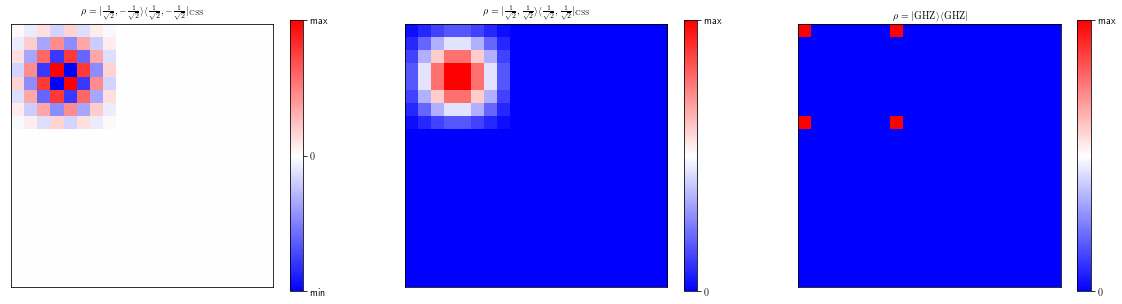

In [17]:
# Plots for density matrices that are not diagonal in the Dicke basis

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Antisymmetric Coherent Spin State
fig1 = axes[0].imshow(rho1, cmap = c_map)
axes[0].set_title(r'$\rho=|\frac{1}{\sqrt{2}},-\frac{1}{\sqrt{2}}\rangle\langle\frac{1}{\sqrt{2}},-\frac{1}{\sqrt{2}}|_\mathrm{CSS}$', fontsize = label_size)
cb = plt.colorbar(fig1,ax=axes[0])

fig1.set_clim([np.min(rho1),np.max(rho1)])
cb.set_ticks( [np.min(rho1),0, np.max(rho1)])
cb.set_ticklabels([r'min',r'$0$',r'max'])
plt.setp(axes, xticks=[],yticks=[])

# Symmetric  Coherent Spin State
fig2 = axes[1].imshow(rho4b, cmap = c_map)
cb2 = plt.colorbar(fig2,ax=axes[1])
fig2.set_clim([0,np.max(rho4b)])
cb2.set_ticks( [0, np.max(rho4b)])
cb2.set_ticklabels([r'$0$',r'max'])   
axes[1].set_title(r'$\rho=|\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}}\rangle\langle\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}}|_\mathrm{CSS}$', fontsize = label_size)

# GHZ state
fig3 = axes[2].imshow(rho3b, cmap = c_map)
axes[2].set_title(r'$\rho=|\mathrm{GHZ}\rangle\langle\mathrm{GHZ}|$', fontsize = label_size)
cb3 = plt.colorbar(fig3,ax=axes[2])
fig3.set_clim([0,np.max(rho3b)])
cb3.set_ticks( [np.min(rho3b), np.max(rho3b)])
cb3.set_ticklabels([r'$0$',r'max'])    
plt.show()
plt.close()

The density plots above show that the density matrices relative to the symmetric coherent spin state (CSS), the antisymmetric CSS and the GHZ state are not diagonal in the Dicke basis. All three states occupy only the first sector of the block diagonal matrix, corresponding to $j=N/2$. The same is valid for any CSS, $|\theta,\phi\rangle_\mathrm{CSS}$.

### Uncoupled basis
It is possible to define the symmetric Dicke states ($j=N/2$), the CSS states and the GHZ state in the uncoupled basis, in order to compare problems in different bases. This formalism grows as $2^N$ for the Hilbert space (Hamiltonian, density matrices) and as $4^N$ for the Liouvillian space (Lindbladian terms). 
The quantum objects in the uncoupled basis preserve the correct dimensions (dims) and shape given by the tensor Hilbert space. 

In [18]:
#CSS states
a = 1/np.sqrt(2)
b = 1/np.sqrt(2)
css_sym_uncoupled = css(N2, a, b, basis="uncoupled")
css_antisym_uncoupled = css(N2, a, -b, basis="uncoupled")

In [19]:
excited_uncoupled = excited(N, basis="uncoupled")
ground_uncoupled = ground(N, basis="uncoupled")

In [20]:
ground_uncoupled

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]

In [21]:
superradiant_uncoupled = superradiant(N, basis="uncoupled")
ghz_state_uncoupled = ghz(N, basis="uncoupled")

### Visualizing Time Evolution

In [22]:
nn = 8
sys = Dicke(nn)
sys.collective_emission = 0.1
#sys.dephasing = 0.05
jx,jy,jz=jspin(nn)
sys.hamiltonian = jz #+ 0.5*jx**2
print(sys)
lv = sys.liouvillian()
t = np.linspace(0,12,30)
rho0 = css(nn)
result = mesolve(lv, rho0,t, [], 
                 e_ops = [jz], 
                 options=Options(store_states=True))
rhot = result.states
jzt = result.expect[0]

ims = []
fig, ax = plt.subplots(1,2)
re_rho = np.real(rhot[0].tidyup().full())
nrm = mpl.colors.Normalize(np.min(re_rho), np.max(re_rho))
wmap = wigner_cmap(re_rho)  # Generate Wigner colormap
for i in range(0,len(rhot)):
    re_rho = np.real(rhot[i].tidyup().full())
    im_rho = np.imag(rhot[i].tidyup().full())
    
    im1 = ax[0].imshow(re_rho, animated=True, cmap=wmap,norm=nrm)
    im2 = ax[1].imshow(im_rho, animated=True, cmap=wmap,norm=nrm)
    ims.append([im1, im2])
ani = animation.ArtistAnimation(fig, 
                                ims, interval=200, blit=True,
                                repeat=False)
ax[0].set_title(r"Real part of $\rho(t)$", fontsize=12)
ax[1].set_title(r"Imaginary part of $\rho(t)$", fontsize=12)
plt.suptitle(r"Coherent Spin State $\rho(t)$", fontsize=20)

max_cb =1
min_cb =0

#cb = plt.colorbar()
#cb.set_ticks( [min_cb, max_cb])
#cb.set_ticklabels([r'$0$',r'max'])
plt.close()
#ani.save('rhot_anim.htm')
HTML(ani.to_jshtml())

N = 8
Hilbert space dim = (25, 25)
Number of Dicke states = 25
Liouvillian space dim = (625, 625)
collective_emission = 0.1


## $4$. $\texttt{pisolve}$: A Fast Diagonal Solver
In the cases in which the Hamiltonian is diagonal in the Dicke basis, i.e. it can be expressed only in terms of $\mathbf{J}^2$ and $J_z$, the time evolution reduces to calculating the diagonal terms of the density matrix, which are decoupled from the off-diagonal terms. 

If this is the case, and if the initial density matrix is diagonal in the Dicke basis, 
an ad-hoc solver for the Dicke object can be used, $\texttt{pisolve}$. This solver, which handles only $O(N^2)$ terms instead of $O(N^3)$ for the general case, has a better performance. See Ref. [1] for more details. 

Behind the scenes, $\texttt{pisolve}$ creates a Pim object (Permutational invariant matrix) and passes the diagonal part of the density matrix as a vector, $p $,  to solve a dynamics of the type

\begin{eqnarray}
\dot{p}&=&Mp,
\end{eqnarray}
where the coefficient matrix $M$ is now only of side $O(N^2)$. The result is then given back in terms of a total density matrix as a quantum object $\texttt{Qobj}$.

Below an example is given of the use of this solver, $\texttt{pisolve}$.

In [23]:
N = 10
ensemble = Dicke(N)
ensemble.emission = 0.2
jz = jspin(N,"z")
jp = jspin(N,"+")
jm = jp.dag()
w0 = 1
ensemble.hamiltonian = w0*jz+jp*jm
rho_tls = dicke(N, N/2, 0)
t = np.linspace(0, 20, 40)
result = ensemble.pisolve(rho_tls, t)
rhot = result.states
jzt = expect(rhot, jz)
jpjmt = expect(rhot, jp*jm)

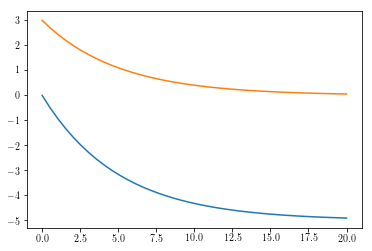

In [24]:
plt.figure()
plt.plot(t,jzt,t,jpjmt/N)
plt.show()
plt.close()

In [25]:
ims = []
size = 6
fig, ax = plt.subplots(1,2,figsize=(size,size))
re_rho = np.real(rhot[0].tidyup().full())
wmap = wigner_cmap(re_rho)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(0, re_rho.max())
max_cb =np.max(re_rho)
min_cb =np.min(re_rho)
for i in range(0,len(rhot)):
    re_rho = np.real(rhot[i].tidyup().full())
    im_rho = np.imag(rhot[i].tidyup().full())
    im1 = ax[0].imshow(re_rho, animated=True, cmap=wmap, norm=nrm)
    im2 = ax[1].imshow(im_rho, animated=True, cmap=wmap, norm=nrm)
    ims.append([im1, im2])

ani = animation.ArtistAnimation(fig, 
                                ims, interval=100, blit=True,
                                repeat=False)
ax[0].set_title(r"Real part of $\rho(t)$", fontsize=12)
ax[1].set_title(r"Imaginary part of $\rho(t)$", fontsize=12)
ax[0].set_yticks( [N/2+1,len(re_rho)-1])
ax[0].set_yticklabels( [r'N/2',r"0"])
ax[0].set_xticks( [N/2+1,len(re_rho)-1])
ax[0].set_xticklabels( [r'N/2',r"0"])
ax[1].set_yticks( [N/2+1,len(re_rho)-1])
ax[1].set_yticklabels( [r'N/2',r"0"])
ax[1].set_xticks( [N/2+1,len(re_rho)-1])
ax[1].set_xticklabels( [r'N/2',r"0"])
plt.close()
#ani.save('rhot_anim.htm')
HTML(ani.to_jshtml())

## Performance
Below we benchmark the solution of a dynamics with all dissipative terms for a permutational invariant problem in which the Liouvillian is given in the Dicke basis with PIQS ($\texttt{qutip.piqs}$) or in the general uncoupled basis of $N$ two level systems. The $\texttt{mesolve}$ solver is used in both cases. 

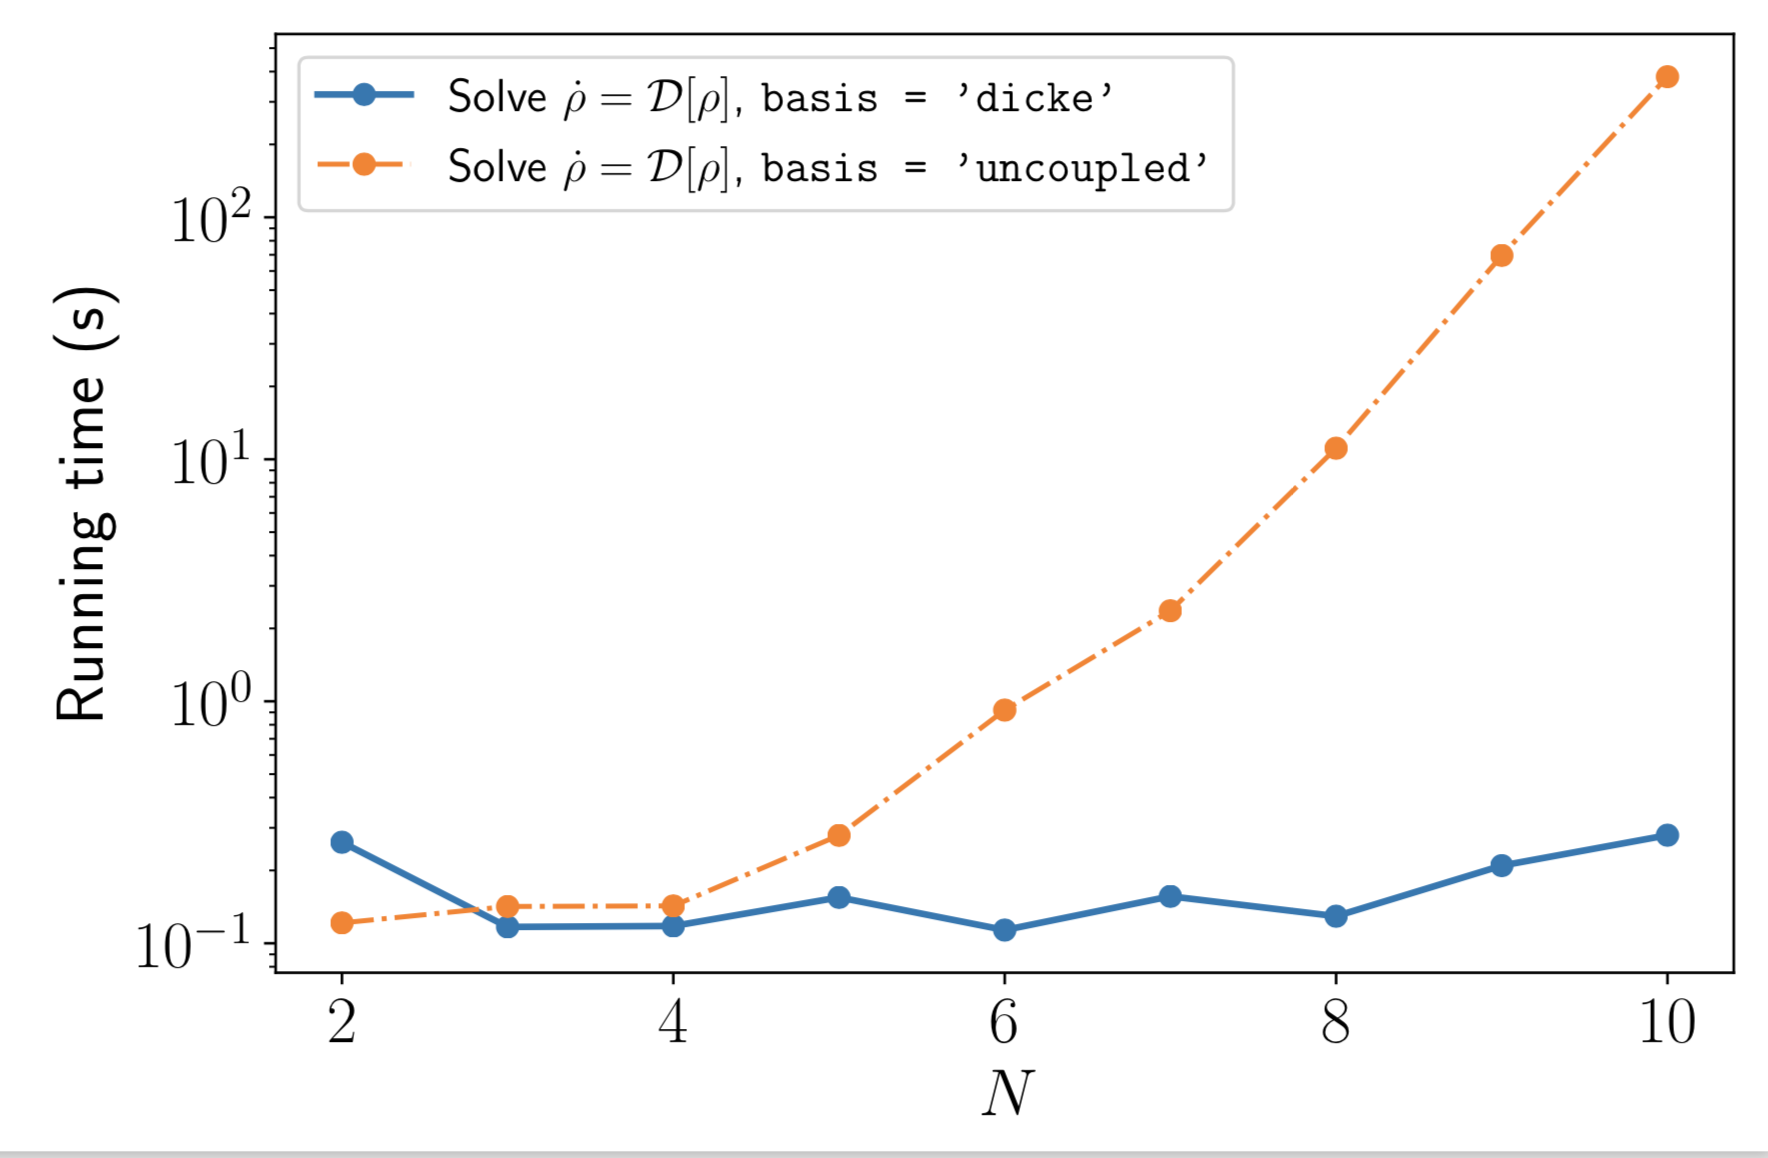

In [26]:
display(Image('images/piqs_performance_small_N.png', width=600, unconfined=True))

Below we benchmark the solution of a dynamics with all dissipative terms for a permutational invariant problem in which the Liouvillian is built and then used to solve the dynamics (Computer Memory: 16 GB RAM at 2133 MHz; CPU: 2.3 GHz Intel Core i5). The $\texttt{mesolve}$ solver is compared to $\texttt{pisolve}$, which performs better but which can be used only in a subset of cases. 

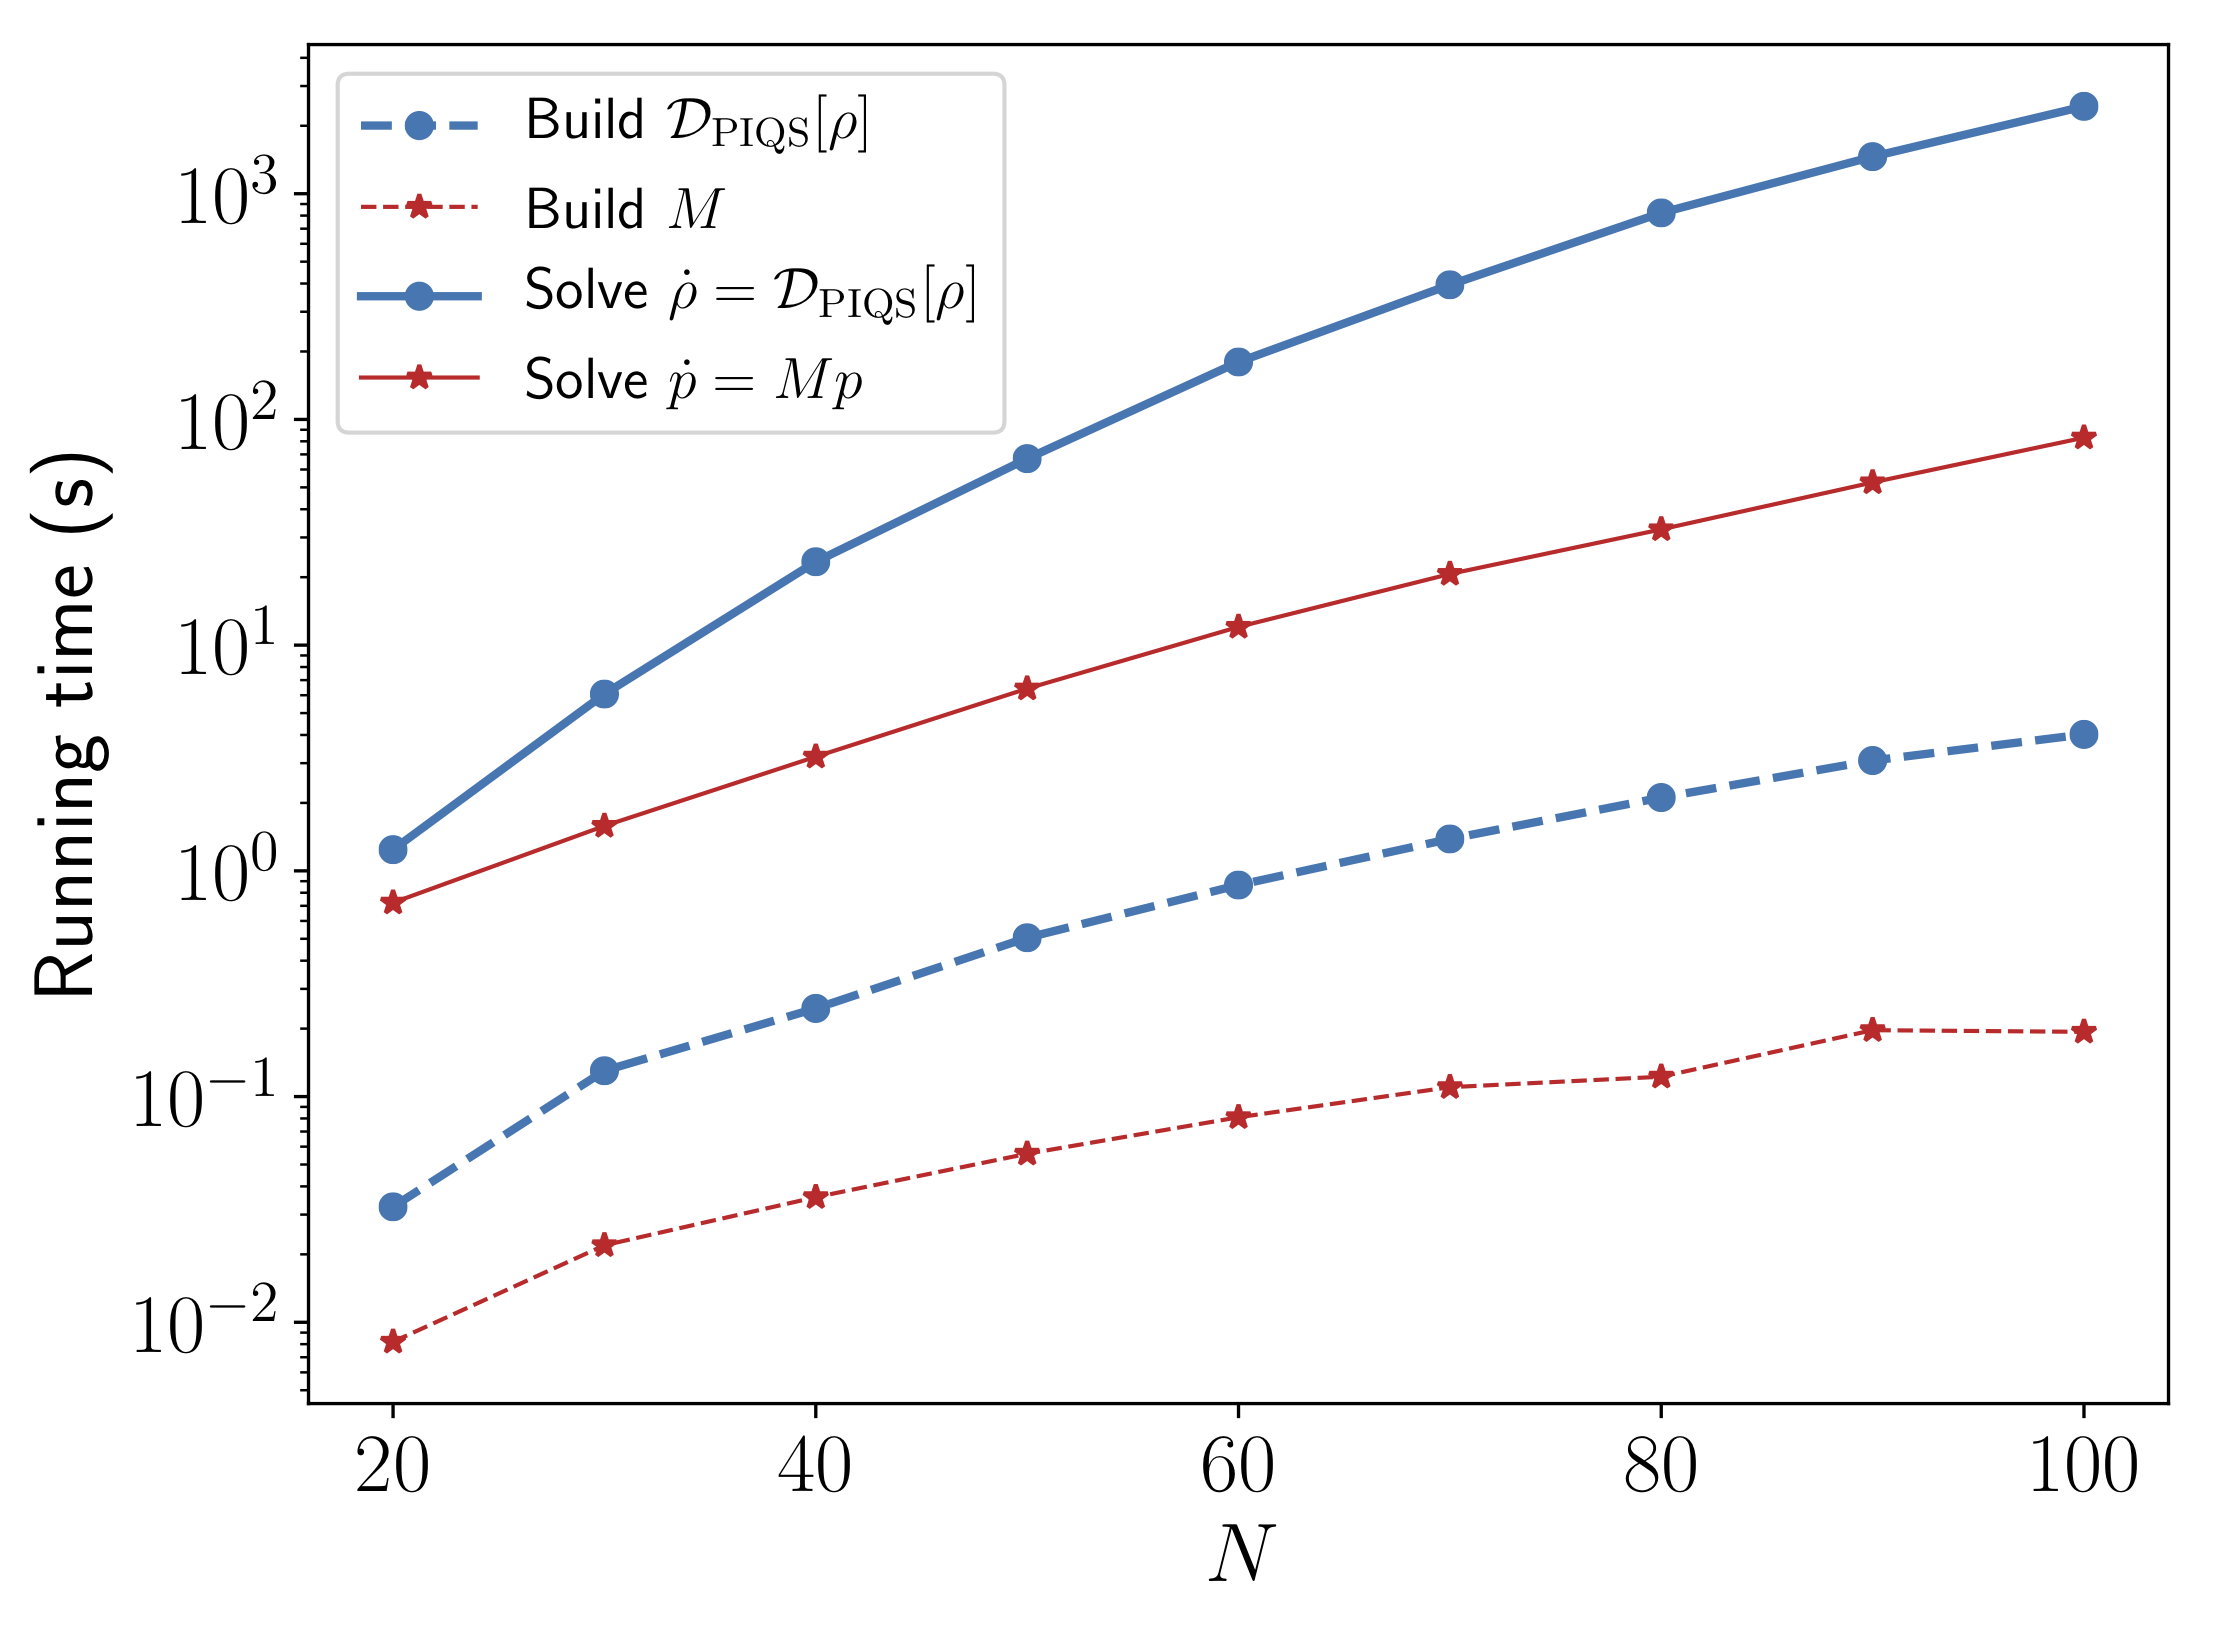

In [27]:
display(Image('images/piqs_performance_large_N.png', width=600, unconfined=True))

## References

[1] N. Shammah, S. Ahmed, N. Lambert, S. De Liberato, and F. Nori, Open quantum systems with local and collective incoherent processes: Efficient numerical simulation using permutational invariance, https://arxiv.org/abs/1805.05129 and https://github.com/nathanshammah/piqs/. Please cite this paper if you use PIQS or qutip.piqs. 

[2] J. R. Johansson, P. D. Nation, and F. Nori, *Comp. Phys. Comm.* **183**, 1760 (2012). http://qutip.org

[3] B.A. Chase and J.M. Geremia, *Phys Rev. A* **78**, 052101 (2008); B. Q. Baragiola, B. A. Chase, and J. Geremia, Phys. Rev. A 81, 032104 (2010)

[4] M. Xu, D.A. Tieri, and M.J. Holland, *Phys Rev. A* **87**, 062101 (2013)

[5] S. Hartmann, *Quantum Inf. Comput.* **16**, 1333 (2016)

[6] F. Damanet, D. Braun, and J. Martin, *Phys. Rev. A* **94**, 033838 (2016)

[7] P. Kirton and J. Keeling, , *Phys. Rev. Lett.* **118**, 123602 (2017) https://github.com/peterkirton/permutations 

[8] N. Shammah, N. Lambert, F. Nori, and S. De Liberato,  *Phys Rev. A* **96**, 023863 (2017)

[9] M. Gegg and M. Richter, *Sci. Rep.* **7**, 16304 (2017) https://github.com/modmido/psiquasp

In [28]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.3.0
Numpy Version:      1.13.3
Scipy Version:      1.0.0
Cython Version:     0.27.3
Matplotlib Version: 2.1.1
Python Version:     3.6.3
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   False
INTEL MKL Ext:      True
Platform Info:      Darwin (x86_64)
Installation path:  /Users/nathanshammah/Downloads/Applications/lib/python3.6/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex file can be easily generated using `qutip.cite()`


In [29]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and Franco Nori},
title = {{QuTiP} 2: A Python framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and Franco Nori},
title = {{QuTiP}: An open-source Python framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
